In [1]:
# Import GeoWombat
import geowombat as gw

# import plotting
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

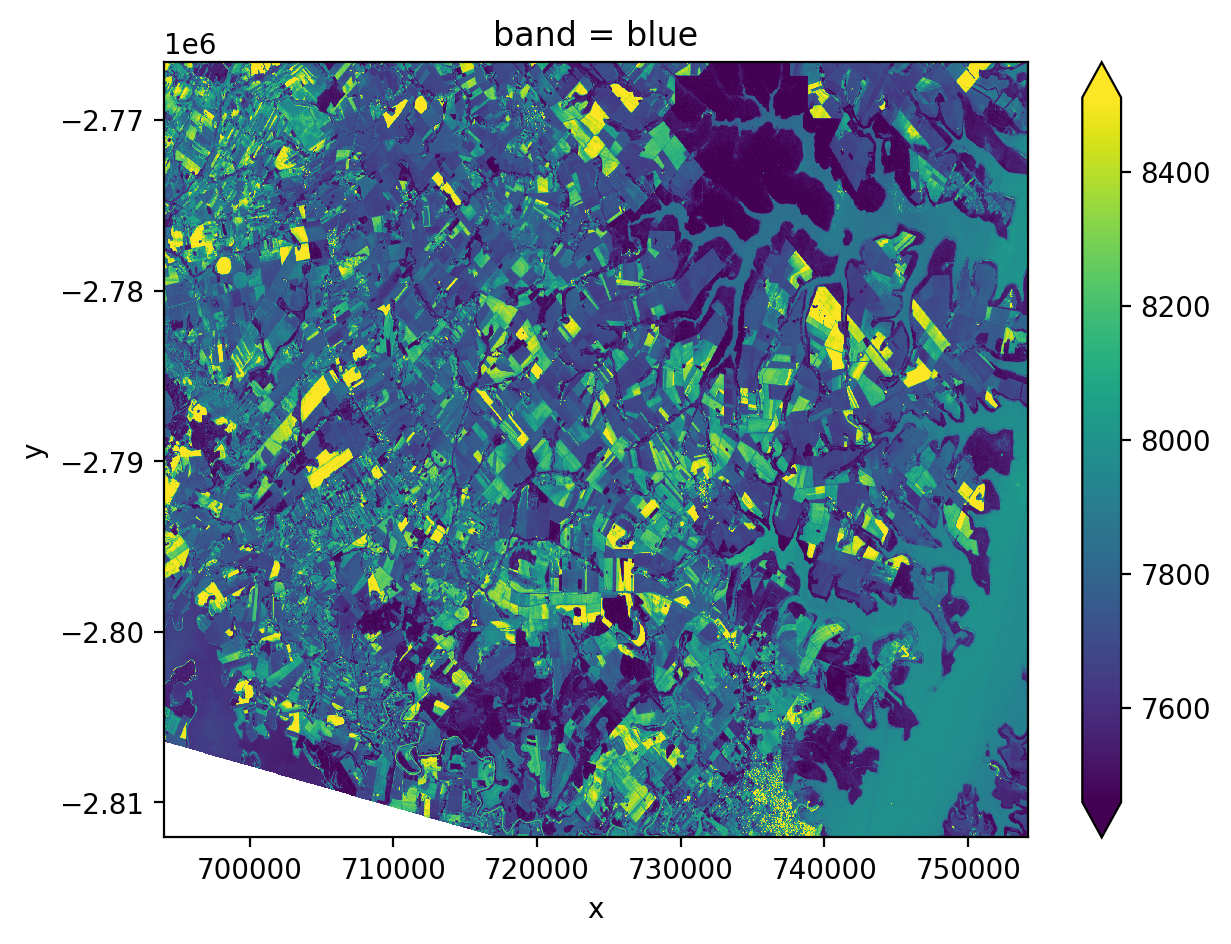

In [2]:
from geowombat.data import l8_224077_20200518_B2 

fig, ax = plt.subplots(dpi=200)

with gw.open(l8_224077_20200518_B2,
                band_names=['blue']) as src:
    src.where(src != 0).sel(band='blue').plot.imshow(robust=True, ax=ax)
plt.tight_layout(pad=1)

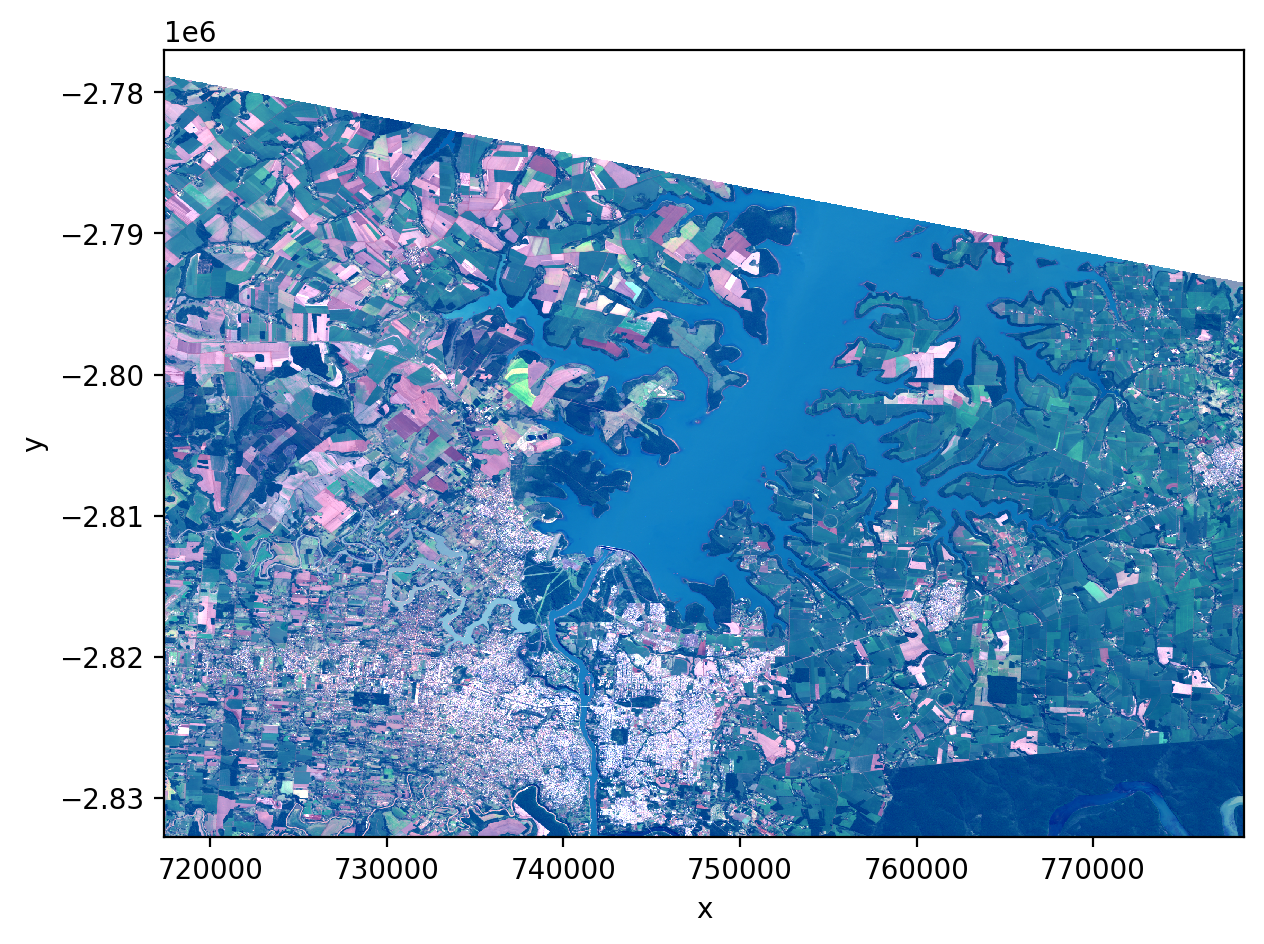

In [3]:
# load example data
from geowombat.data import l8_224078_20200518

fig, ax = plt.subplots(dpi=200)
with gw.open(l8_224078_20200518) as src:
    src.where(src != 0).sel(band=[3, 2, 1]).plot.imshow(robust=True, ax=ax)
plt.tight_layout(pad=1)

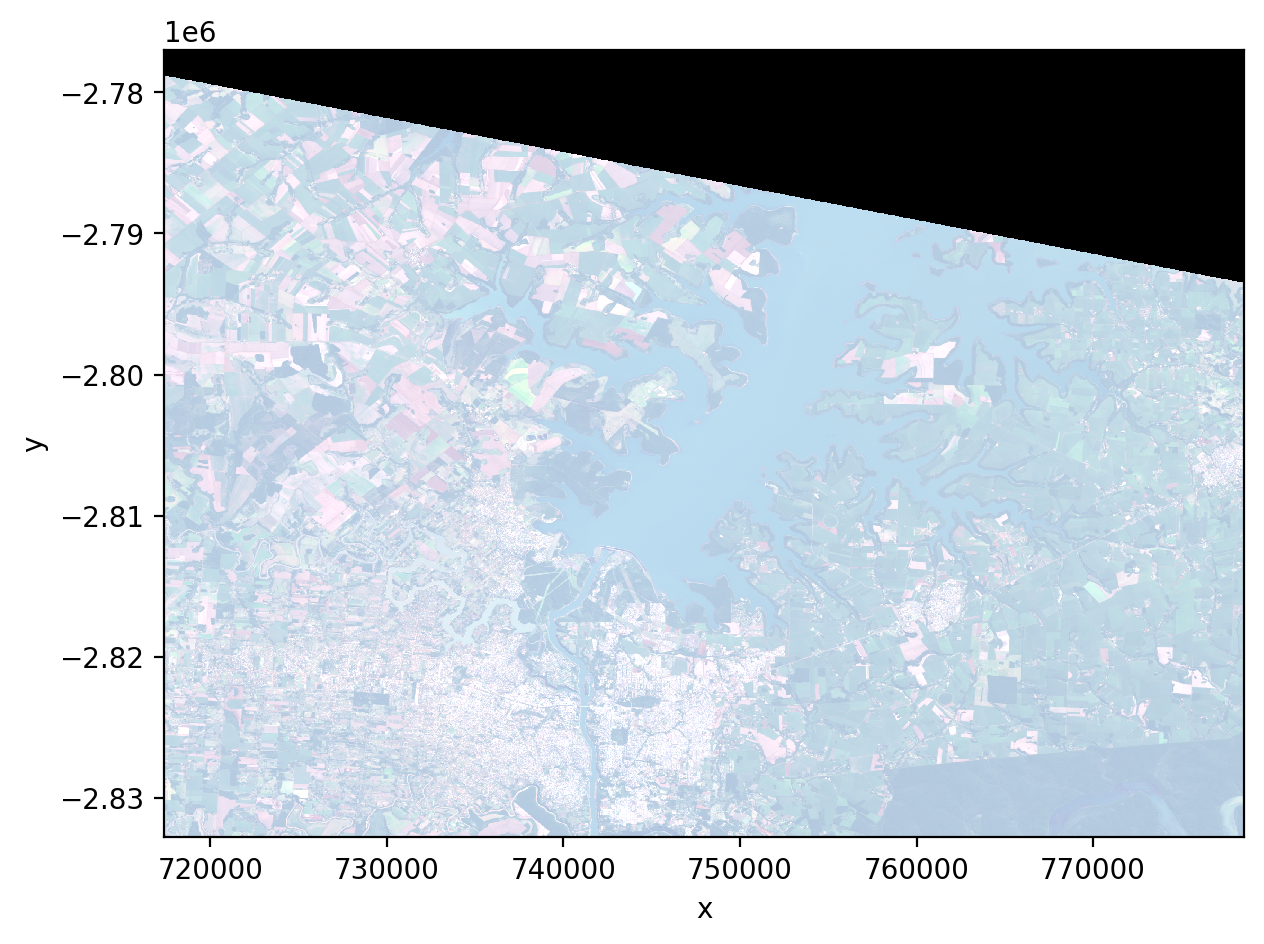

In [4]:
# load example data

fig, ax = plt.subplots(dpi=200)
with gw.open(l8_224078_20200518, nodata=0) as src:
    src.sel(band=[3, 2, 1]).plot.imshow(robust=True, ax=ax)
plt.tight_layout(pad=1)

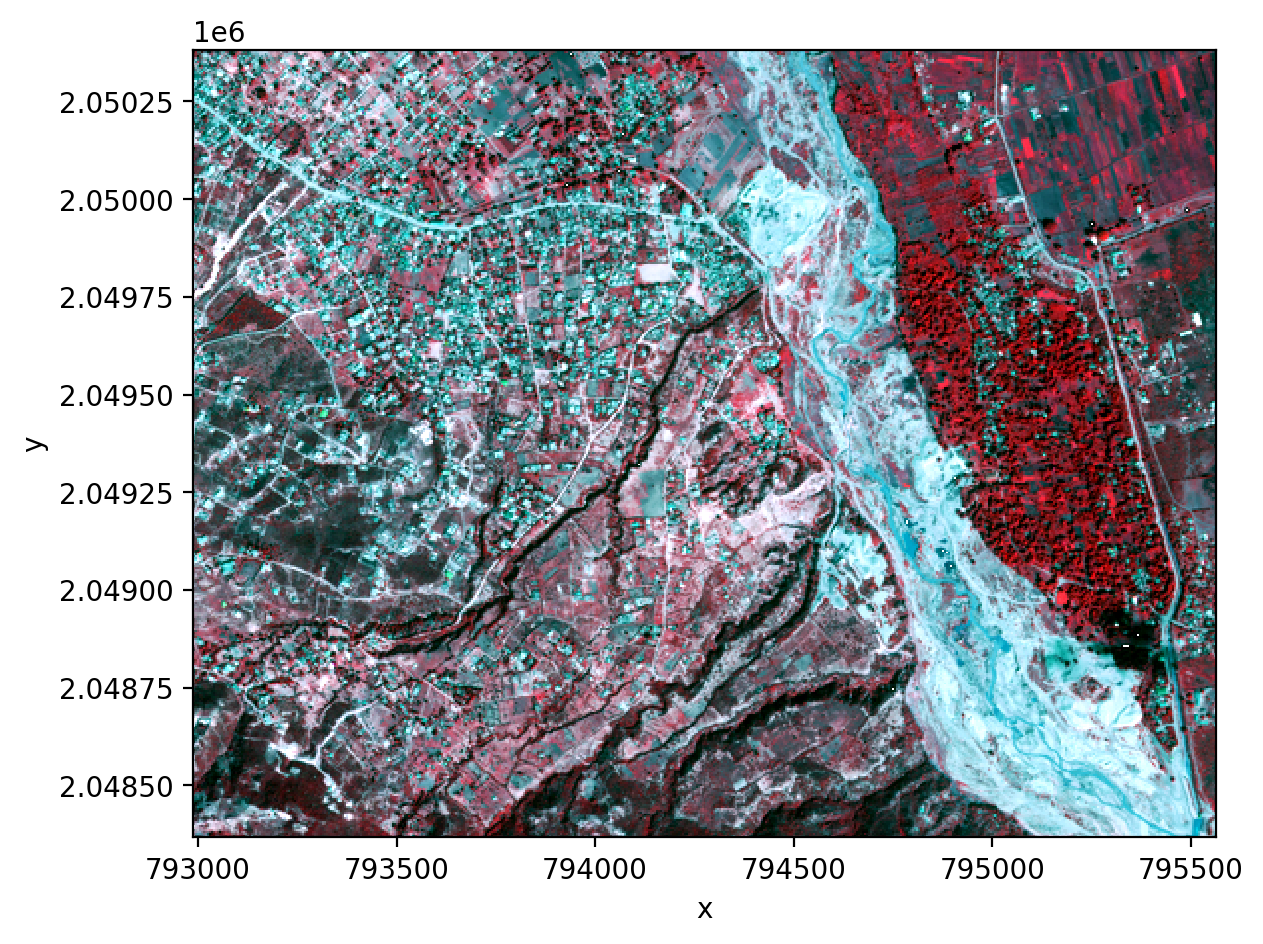

In [5]:
from geowombat.data import rgbn

fig, ax = plt.subplots(dpi=200)

with gw.open(rgbn,
            band_names=['red','green','blue','nir'],) as src:
    src.where(src != 0).sel(band=['nir','red', 'green']).plot.imshow(robust=True, ax=ax)
plt.tight_layout(pad=1)
plt.savefig("rgb_plot.png", dpi=150)

In [6]:
from geowombat.data import l8_224077_20200518_B4, l8_224078_20200518_B4

def plot(bounds_by, ref_image=None, cmap='viridis'):
    fig, ax = plt.subplots(dpi=200)
    with gw.config.update(ref_image=ref_image):
        with gw.open([l8_224077_20200518_B4, l8_224078_20200518_B4],
                        band_names=['nir'],
                        chunks=256,
                        mosaic=True,
                        bounds_by=bounds_by,
                        persist_filenames=True) as srca:
            # Plot the NIR band
            srca.where(srca != 0).sel(band='nir').plot.imshow(robust=True, cbar_kwargs={'label': 'DN'}, ax=ax)
            # Plot the image chunks
            srca.gw.chunk_grid.plot(color='none', edgecolor='k', ls='-', lw=0.5, ax=ax)
            # Plot the image footprints
            srca.gw.footprint_grid.plot(color='none', edgecolor='orange', lw=2, ax=ax)
            # Label the image footprints
            for row in srca.gw.footprint_grid.itertuples(index=False):
                ax.scatter(row.geometry.centroid.x, row.geometry.centroid.y,
                            s=50, color='red', edgecolor='white', lw=1)
                ax.annotate(row.footprint.replace('.TIF', ''),
                            (row.geometry.centroid.x, row.geometry.centroid.y),
                            color='black',
                            size=8,
                            ha='center',
                            va='center',
                            path_effects=[pe.withStroke(linewidth=1, foreground='white')])
            # Set the display bounds
            ax.set_ylim(srca.gw.footprint_grid.total_bounds[1]-10, srca.gw.footprint_grid.total_bounds[3]+10)
            ax.set_xlim(srca.gw.footprint_grid.total_bounds[0]-10, srca.gw.footprint_grid.total_bounds[2]+10)
    title = f'Image {bounds_by}' if bounds_by else str(Path(ref_image).name.split('.')[0]) + ' as reference'
    size = 12 if bounds_by else 8
    ax.set_title(title, size=size)
    plt.tight_layout(pad=1)

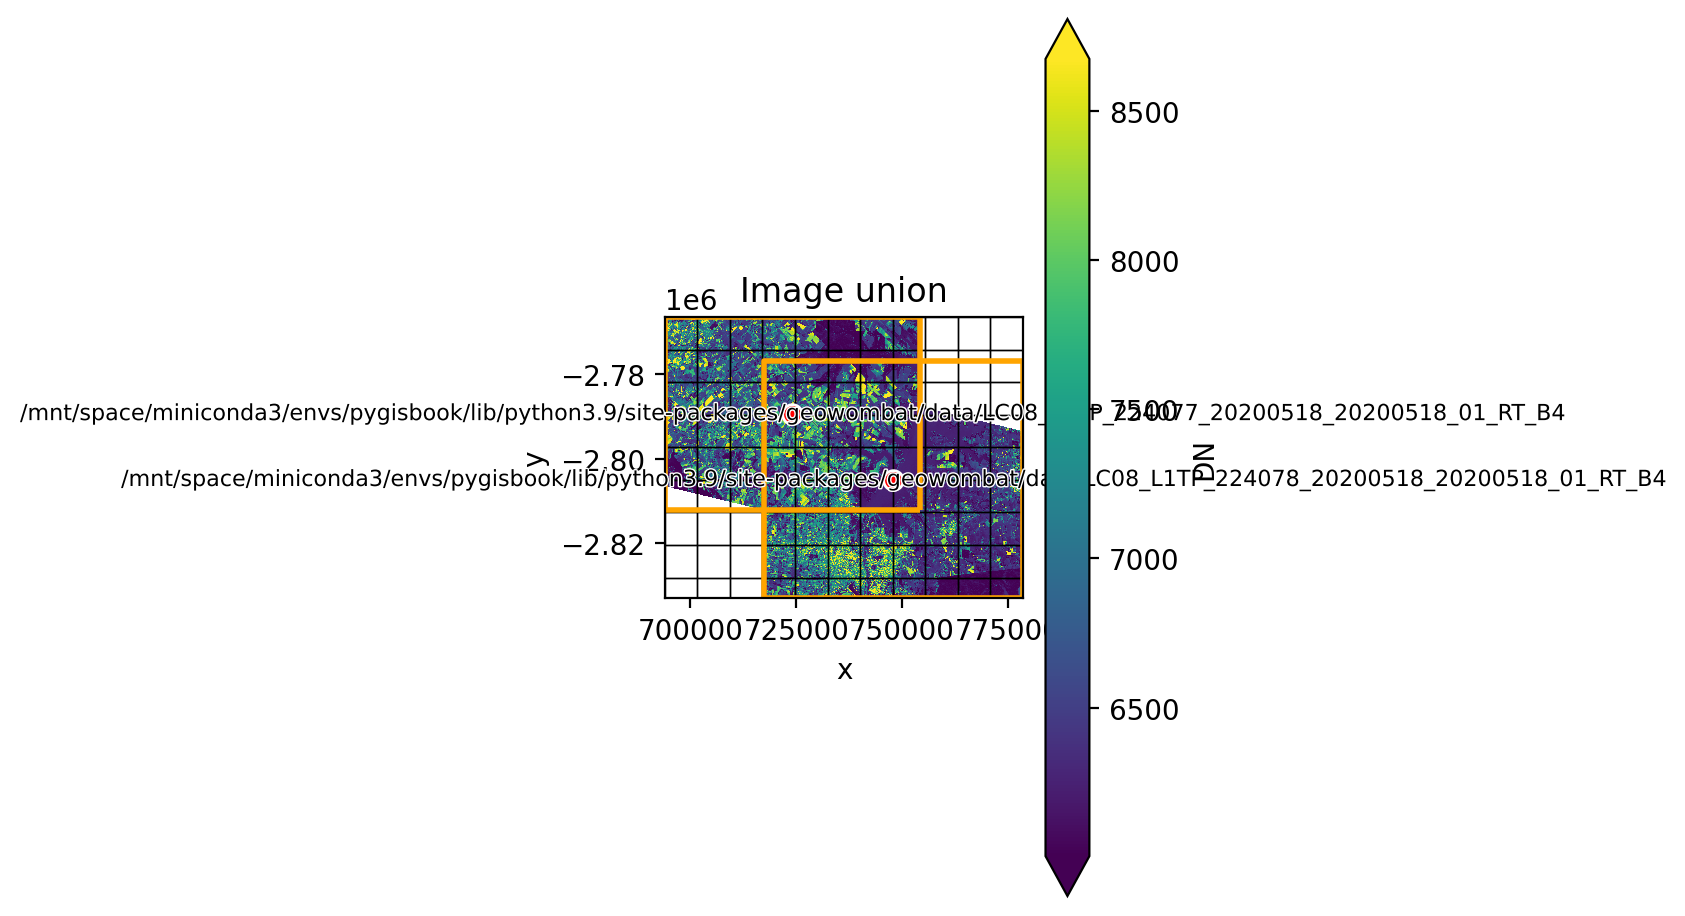

In [7]:
plot('union')